### Police Arrests Dataset

### Context/ Problem Statement:
The dataset under consideration comprises over 113,299 police arrest records, capturing a broad spectrum of variables ranging from arrestee demographics (e.g., age, sex, address) and physical characteristics (e.g., height, weight) to contextual factors such as arrest timing, location, and the presence of weapons or drugs. Such datasets provide valuable opportunities for data-driven criminological research and policy analysis.
This study seeks to explore the patterns and predictors of drug-related arrests, which remain a persistent issue within the broader landscape of criminal justice and public health. By analyzing the socio-demographic and situational correlates of arrests, we aim to construct a predictive model that can distinguish between drug-related and non-drug-related incidents. This endeavor not only contributes to the growing body of research on predictive policing and risk assessment but also raises important questions about fairness, bias, and the responsible use of algorithmic tools in law enforcement contexts.
The core research question guiding this analysis is:
"To what extent can features present at the time of arrest be used to accurately predict whether an arrest is drug-related?"
To address this, we employ classification techniques within a supervised machine learning framework, following a rigorous process of data cleaning, feature selection, and model evaluation.


### Objective
The objective of this model is to predict whether an arrest is drug-related based on demographic, situational, and contextual features present at the time of arrest.

### Data Description:
- Temporal Coverage: The dataset spans multiple years of police arrest records, with features such as ArArrestDate and ArArrestTime capturing when the arrest occurred.
- Arrestee Demographics: Includes attributes like Age, Sex, Height, Weight, and BirthPlace to describe individual characteristics.
- Arrest Location: Variables such as ArLAddress, ArLCity, ArLZip, ArState, and ArLDistrict provide detailed geographic information about where arrests occurred.
- Home Address Info: Includes arrestee home data (HAddress, HZIP, HCity, HState), which may be used to explore residence-arrest location relationships.
- Officer and Transport Details: Fields like ArOfcr1, Transport1, and Transport2 give information on the arresting officers and transportation used.
- Legal Context: The column ArAction describes the legal action taken, while ArWeapon indicates whether any weapons were involved.
- Drug-Related Information: Key fields such as DrugRelated, Drug, and DrugType capture whether the arrest was associated with drugs and what type.
- Visual Descriptors: The dataset contains clothing details (ClothingWorn) and physical identifiers such as Tatoo, Hair, and Eyes.
- Data Quality Issues: Several fields contain missing or inconsistent values (e.g., ArOSR, ArResisted, and JobSchStatus have mostly nulls), requiring data cleaning.
- Outcome Variable: The DrugRelated column is used as the primary target for modeling, serving as a binary classification variable indicating drug involvement.

In [16]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Loading the Dataset

In [36]:
# Load the uploaded dataset
data = pd.read_csv("E:/ASDS/6302 Machine Learning/Police_arrests.csv")
print(data.shape)
data.sample(3)

(113299, 65)


,IncidentNum,ArrestYr,ArrestNumber,ArArrestDate,ArArrestTime,ArBkDate,ArLAddress,ArLApt,ArLZip,ArLCity,...,TatooComment,Occupation,JobSchStatus,Employer,Drug,DrugRelated,DrugType,ClothingWorn,Expunged,UpZDate
88400,258906-2019,2019,19-046143,"Dec 27, 2019",10:27,"Dec 27, 2019",36000 L B J FWY,NaN,75241.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,Yes,Other Non-Prescription Drugs,JEANS AND SWEATER,NaN,2019-12-30 14:52:54
102437,111650-2020,2020,20-019808,"Jun 25, 2020",19:37,"Jun 25, 2020",1300 STRICKLAND ST,NaN,75216.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,Yes,Cultivated Marijuana,"T SHIRT, SWEATS, SLIPPERS",NaN,2020-12-18 09:37:39
112027,145641-2021,2021,21-024593,"Aug 14, 2021",02:46,"Aug 14, 2021",2900 W DAVIS ST,NaN,75211.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,No,NaN,RED JERSEY; BLACK SHORTS; CLEATS,NaN,2021-08-14 09:05:53


### Check the data types of the columns for the dataset.


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113299 entries, 0 to 113298
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IncidentNum      113299 non-null  object 
 1   ArrestYr         113299 non-null  int64  
 2   ArrestNumber     113299 non-null  object 
 3   ArArrestDate     113299 non-null  object 
 4   ArArrestTime     113299 non-null  object 
 5   ArBkDate         113059 non-null  object 
 6   ArLAddress       113279 non-null  object 
 7   ArLApt           9414 non-null    object 
 8   ArLZip           113263 non-null  float64
 9   ArLCity          113218 non-null  object 
 10  ArState          112815 non-null  object 
 11  ArLCounty        111102 non-null  object 
 12  ArLRA            96384 non-null   float64
 13  ArLBeat          110445 non-null  float64
 14  ArLDistrict      106371 non-null  object 
 15  ArLSector        69585 non-null   float64
 16  ArADOW           113299 non-null  obje

### DATA Cleaning


Checking for the Missing Values

In [38]:
# Checking missing values and percentage
missing_values = data.isnull().sum()
missing_percentage = round((missing_values / len(data)) * 100,0)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_df[missing_df['Missing Percentage'] > 0])

                 Missing Values  Missing Percentage
Transport3               113296               100.0
Expunged                 113299               100.0
ArOpComm                 113299               100.0
ArMedFlag                113299               100.0
ArCond                   112928               100.0
JobSchStatus             113299               100.0
ArResisted               113299               100.0
ArOSR                    113299               100.0
Search1                  113298               100.0
AliasName                112585                99.0
Drug                     112718                99.0
TatooComment             110853                98.0
NickName                 109727                97.0
ArMedLoc                 109699                97.0
Tatoo                    108511                96.0
Occupation               107825                95.0
Employer                 104861                93.0
ArLApt                   103885                92.0
DrugType    

### Dropping Low Value Columns

In [40]:
data = data.drop(columns = ['IncidentNum', 'ArrestNumber', 'ArBkDate', 'ArLAddress', 'ArLApt', 'ArLRA', 'ArLBeat','UpZDate','ArMedLoc','HCity', 'HState',
    'ArLDistrict', 'ArLSector', 'CFS_Number', 'ArOfcr1', 'ArOfcr2', 'Transport1', 'Transport2', 'ArCurrLoc', 'BirthPlace', 'HAddress', 'Employer','Height',
    'Transport3', 'Search1', 'ArOSR', 'ArrestYr','ArResisted', 'ArMedFlag', 'ArOpComm', 'ArresteeName', 'HApt','HZIP','HBeat','HRA','Drug', 'ClothingWorn',
    'NickName', 'AliasName', 'TatooComment', 'JobSchStatus', 'Expunged'])
print("Done")
data.shape

Done


(113299, 23)

### Checking Duplicate Rows

In [42]:
# Check for duplicate rows in the cleaned dataset
duplicate_count = data.duplicated().sum()

# Show a few duplicate rows if they exist
duplicate_rows = data[data.duplicated()].head() if duplicate_count > 0 else None

duplicate_count, duplicate_rows

(25,
        ArArrestDate ArArrestTime   ArLZip ArLCity ArState ArLCounty ArADOW  \
 9731   Dec 13, 2024        22:54  75243.0  DALLAS      TX       NaN    Fri   
 30016  Aug 03, 2023        18:26  75219.0  DALLAS      TX    DALLAS    Thu   
 42660  Nov 12, 2023        14:52  75287.0  DALLAS      TX    DENTON    Sun   
 45258  Sep 14, 2015        00:17  75243.0  DALLAS      TX    DALLAS    Mon   
 47002  Apr 29, 2018        02:45  75201.0  DALLAS      TX    DALLAS    Sun   
 
                           ArPremises                 ArAction ArWeapon  ...  \
 9731                           Other           Arrested - CDC  Unarmed  ...   
 30016  Condominium/Townhome Building  Arrested - Lew Sterrett  Unarmed  ...   
 42660          Apartment Parking Lot           Arrested - CDC  Unarmed  ...   
 45258     Highway, Street, Alley ETC                 Arrested      NaN  ...   
 47002     Highway, Street, Alley ETC  Arrested - Lew Sterrett  Unarmed  ...   
 
       Weight   Hair   Eyes          

### Handling  remaing missing values

In [44]:
data['DrugRelated']=data['DrugRelated'].replace(['U','Uknown','Unknown','03','3'],'Yes') #Data entry issues
data.loc[data['DrugType'].notna(), 'DrugRelated'] = 'Yes' #if a drug name is mentioned & drug type is missing, its replaced with a Yes

data.loc[(data['DrugRelated'] == 'Yes') & (data['DrugType'].isna()),'DrugType'] = 'Other Non-Prescription Drugs' #If drug type is yes & name is missing
data.loc[(data['DrugRelated'] != 'Yes') & (data['DrugType'].isna()),'DrugType'] = 'Not Applicable' #If drug type is blank 
data['DrugRelated'] = data['DrugRelated'].fillna('No') #if drug related is blank,

data['ArLCity']=data['ArLCity'].fillna("Others")
data['ArState']=data['ArState'].fillna("Others")
data['ArLCounty']=data['ArLCounty'].fillna("Others")
data['ArPremises']=data['ArPremises'].fillna("Others")

data['ArAction']=data['ArAction'].fillna("Others")
data['ArWeapon']=data['ArWeapon'].replace(['N/A'],"None")
data['ArWeapon']=data['ArWeapon'].fillna("None")

data['ArLZip']=data['ArLZip'].fillna(data['ArLZip'].mode()[0])
data['ArLZip'] = data['ArLZip'].replace([0.0, 7521.0], data['ArLZip'].mode()[0])
data['ArLCounty']=data['ArLCounty'].replace(['TARR','TARRAN'],"TARRANT")
data['ArState']=data['ArState'].replace(['T'],"TX")

Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Optionally cap outliers
data['Weight'] = data['Weight'].clip(lower=lower_bound, upper=upper_bound)
data['Weight']=data['Weight'].fillna(data['Weight'].mean())

data['ArCond']=data['ArCond'].fillna(1)
data['ArCond']=data['ArCond'].replace(["GOOD"],1)
data['ArCond']=data['ArCond'].replace(["DECEAS"],5)
#data['ArMedLoc']=data['ArMedLoc'].fillna("Others")
data['Age']=data['Age'].fillna(18)
data['AgeAtArrestTime']=data['AgeAtArrestTime'].fillna(data['Age'])
data['AgeAtArrestTime']=data['AgeAtArrestTime'].fillna(18)
#data['HAddress']=data['HAddress'].fillna("Homeless")

#data['HState']=data['HState'].fillna("Unknown")
data['Hair']=data['Hair'].fillna("Other")
data['Hair']=data['Hair'].replace(['N/A','04','23','TEST'],"Other")
data['Eyes']=data['Eyes'].fillna("Unknown")
data['Eyes']=data['Eyes'].replace(['Other','Others','04','08'],"Unknown")
data['Race']=data['Race'].fillna("Unknown")
data['Race']=data['Race'].replace(['H'],"Hispanic or Latino")
data['Race']=data['Race'].replace(['NH'],"Native Hawaiian/Pacific Islander")
data['Ethnic']=data['Ethnic'].fillna("Unknown")
data['Sex']=data['Sex'].fillna("Male")
data['Sex']=data['Sex'].replace(['TEST','Unknown','UNKNOWN'],"Male")

data['Occupation']=data['Occupation'].fillna("Unknown")
data['Occupation']=data['Occupation'].replace(['`','N/A', 'N/A Status: U', 'N\A', 'NA', 'NONE', 'NONE Status: U', 'NONE`', 'Status:', 'Status: E', 'Status: U', 'U', 'UNKNOW'],"Unknown")
data['Occupation']=data['Occupation'].replace(['BRICK LAYER','BUILDER','CONCRETE WORKER','CONSTRUCTION WORKER','DRYWALL/CONSTRUCTION','MAINTENANCE'],"Construction")
data['Occupation']=data['Occupation'].replace(['10TH GRADE STUDENT','11TH GRADE','COLLEGE STUDENT','FULL TIME STUDENT','','STUDENT Status: U'],"Student")
data['Occupation']=data['Occupation'].replace(['BEHAVIORAL THERAPIST','DENTAL IMPLANT TECH','DOCTOR','PHARMACY TECH','HOME HEALTH CAR'],"Healthcare")
data['Occupation']=data['Occupation'].replace(['COOK','SERVER','WAITER','BARTENDER','HOSTESS','KITCHEN STAFF','FOOD SERVER','PIZZA DELIVERY'],"Food Service")
data['Occupation']=data['Occupation'].replace(['DELIVERY DRIVER','DRIVER','TRUCK DRIVER','PACKAGE HANDLER','ORDER PICKER','FORKLIFT OPERATOR'],"Logistics/Delivery")
data['Occupation']=data['Occupation'].replace(['SALES ASSOCIATE','CASHIER','STORE MANAGER','SALESMAN'],"Retail/Sales")
data['Occupation']=data['Occupation'].replace(['SECURITY GUARD','SECURITY OFFICER','LOSS PREVENTION'],"Security")
data['Occupation']=data['Occupation'].replace(['CUSTODIAN','JANITOR','CLEANER','WINDOW WASHER','WASTE COLLECTOR'],"Janitorial/Cleaning")
data['Occupation']=data['Occupation'].replace(['CARPENTER','ELECTRICIAN','ENGINEER','TECHNICIAN','PLUMBER','INSTALLER','MECHANIC'],"Technical/Skilled")
data['Occupation']=data['Occupation'].replace(['NONE','UNEMPLOYED'],"Unemployed")

valid_occupations = [
    'Other',
    'Technical/Skilled',
    'Retail/Sales',
    'Unemployed',
    'Logistics/Delivery',
    'Construction',
    'Food Service',
    'Student',
    'Janitorial/Cleaning',
    'Security',
    'Healthcare',
    'UNKNOWN'
]

# Set all values not in list to 'Other'
data.loc[~data['Occupation'].isin(valid_occupations), 'Occupation'] = 'Other'

data['Tatoo']=data['Tatoo'].fillna("None")
#data['Employer']=data['Employer'].fillna("Unknown")
#data['Employer']=data['Employer'].replace(['NONE','NONE - HOMELESS','NONE / UNKNOWN','NONE KNOWN','NO','UNK','UNKNOWN','UNKNOWN / UNKNOWN','UNKNOWN BAKERY','UNKNOWN FUNERAL HOME','UNKNOWN OIL FIELD','UNKNOWN REFUSED','UNKNOWN RESTURUANT','UNMEPLOYED','UNMPLOYED'],'Unknown')

# Extract the hour
data['ArArrestTime'] = pd.to_datetime(data['ArArrestTime'], format='%H:%M', errors='coerce').dt.hour
data['ArArrestDate'] = pd.to_datetime(data['ArArrestDate'], format= '%b %d, %Y', errors='coerce').dt.month
data['ArAction']=data['ArAction'].replace(['Arrested - CDC','Arrested - Lew Sterrett','Arrested - Other','Arrested - Released To Appear (CITATION)','Arrested - Released To Appear (HB2391)','Arrested - Released To Hospital (APOWW)','Arrested - Released To Other Agency'],"Arrested")

#city_counts = data['HCity'].value_counts()
#data['HCity'] = data['HCity'].replace(city_counts[city_counts < 100].index, 'Other')
#data['HCity']=data['HCity'].fillna("Unknown")
#data['HCity']=data['HCity'].replace(['UNK','UNKNOWN','UNKOWN'],"Unknown")

city_mapping = {
    'DAL': 'DALLAS',
    'DALALS': 'DALLAS',
    'DALAS': 'DALLAS',
    'DALLA': 'DALLAS',
    'DALLAAS': 'DALLAS',
    'DALLAS': 'DALLAS',
    'DALLASQ': 'DALLAS',
    'DALLASZ': 'DALLAS',
    'DALLLAS': 'DALLAS',
    'DALLS': 'DALLAS',
    'DLLAS': 'DALLAS',
    'DLS': 'DALLAS',
    'FIRST BAPTIST CHURCH OF D': 'DALLAS',
    'SALLAS': 'DALLAS',
    'UNIVERSITY PARK': 'DALLAS',
    
    'GRAND PRAI': 'GRAND PRAIRE',
    'GRAND PRAIRE': 'GRAND PRAIRE',
    'GRAND PRAIRIE': 'GRAND PRAIRE',
    'GRANPRAIRI': 'GRAND PRAIRE',
    
    'ALLEN': 'BALCH SPRINGS',
    'BALCH SPRINGS': 'BALCH SPRINGS',
    'BALCHSPRIN': 'BALCH SPRINGS',
    
    'ALRINGTON': 'ARLINGTON',
    'ARLINGTON': 'ARLINGTON',
    
    'CANTON': 'CARROLLTON',
    'CARROLLTON': 'CARROLLTON',
    
    'DUNCANVILL': 'DUNCANVILLE',
    'DUNCANVILLE': 'DUNCANVILLE',
    
    'FARMERS BRANCH': 'FARMERS BRANCH',
    'FARMERSBRA': 'FARMERS BRANCH',
    
    'FORT WORTH': 'FORT WORTH',
    'FT WORTH': 'FORT WORTH',
    
    'HIGHLAND PARK': 'HIGHLAND PARK',
    'HIGHLANDPA': 'HIGHLAND PARK',
    
    'IRIVNG': 'IRIVNG',
    'IRVING': 'IRIVNG',
    
    'Others': 'Others',
    'UNINCORPORATED': 'Others'
}

# Apply the mapping to the 'City' column
data['ArLCity'] = data['ArLCity'].replace(city_mapping)

premises_mapping = {
    'Airport - All Others': 'Airport',
    'Airport - Love Field': 'Airport',
    'Apartment Complex/Building': 'Apartment Complex/Building',
    'Apartment Parking Lot': 'Parking lot',
    'Apartment Residence': 'Apartment Complex/Building',
    'Bar/NightClub/DanceHall ETC.': 'Bar/NightClub/DanceHall ETC.',
    'Business Office': 'Business Office',
    'City Park/Rec/Tennis/Golf/Trail': 'Outdoor Area Public/Private',
    'Commercial Property Occupied/Vacant': 'Business Office',
    'Condominium/Townhome Building': 'Apartment Complex/Building',
    'Condominium/Townhome Parking': 'Apartment Complex/Building',
    'Condominium/Townhome Residence': 'Apartment Complex/Building',
    'Convenience Store': 'Outdoor Area Public/Private',
    'Entertainment/Sports Venue': 'Outdoor Area Public/Private',
    'Financial Institution': 'Business Office',
    'Gas or Service Station': 'Gas or Service Station',
    'Government Facility': 'Government Facility',
    'Highway, Street, Alley ETC': 'Highway, Street, Alley ETC',
    'Industrial/Manufacturing': 'Business Office',
    'Medical Facility': 'Medical Facility',
    'Motor Vehicle': 'Highway, Street, Alley ETC',
    'Other': 'Other',
    'Others': 'Other',
    'Outdoor Area Public/Private': 'Outdoor Area Public/Private',
    'Parking Lot (All Others)': 'Parking lot',
    'Parking Lot (Apartment)': 'Parking lot',
    'Parking Lot (Park)': 'Parking lot',
    'Personal Services': 'Outdoor Area Public/Private',
    'Religious Institution': 'Religious Institution',
    'Restaurant/Food Service/TABC Location': 'Restaurant/Food Service/TABC Location',
    'Retail Store': 'Outdoor Area Public/Private',
    'School/Daycare': 'School/Daycare',
    'Single Family Residence - Occupied': 'Apartment Complex/Building',
    'Single Family Residence - Vacant': 'Apartment Complex/Building',
    'Storage Facility': 'Business Office',
    '': 'Others'  # Assuming blank entries are empty strings
}

weapon_mapping = {
    '33': 'Other',
    'Burn': 'Lethal Instrument',
    'Club': 'Lethal Instrument',
    'Drugs': 'Lethal Instrument',
    'Explosives': 'Explosives',
    'Firearm (Type Not Stated)': 'Firearm (Type Not Stated)',
    'Gas/Carbon Monoxide': 'Lethal Instrument',
    'Gun': 'Firearm (Type Not Stated)',
    'Handgun': 'Firearm (Type Not Stated)',
    'Hands/Feet': 'Hands/Feet',
    'Knife - Butcher': 'Lethal Cutting Instrument',
    'Knife - Other': 'Lethal Cutting Instrument',
    'Knife - Pocket': 'Lethal Cutting Instrument',
    'Lethal Cutting Instrument': 'Lethal Cutting Instrument',
    'Missle/Arrow': 'Lethal Cutting Instrument',
    'None': 'None',
    'Other': 'Other',
    'Other Firearm': 'Firearm (Type Not Stated)',
    'Poison': 'Lethal Instrument',
    'Rock': 'Lethal Instrument',
    'Shotgun': 'Firearm (Type Not Stated)',
    'Stabbing Instrument': 'Lethal Cutting Instrument',
    'Strangulation': 'Hands/Feet',
    'THREATS': 'Hands/Feet',
    'Unarmed': 'None',
    'Vehicle': 'Vehicle'
}

# Define bins and labels for the custom age buckets,Create the age bucket column
age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, float('inf')]
age_labels = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45',
              '46-50', '51-55', '56-60', '61-65', '66-70', '>76']
data['AgeBucket'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)
label_encoder = LabelEncoder()
data['Tatoo'] = data['Tatoo'].astype(str).str.strip().str.lower().ne('none').astype(int)
data['ArADOW'] = label_encoder.fit_transform(data['ArADOW'])

# Apply the mapping to the ArWeapon column
data['ArWeapon'] = data['ArWeapon'].replace(weapon_mapping)

# Apply the mapping
data['ArPremises'] = data['ArPremises'].replace(premises_mapping)
print("done")

#print(data['DrugRelated'].value_counts())
#data['DrugRelated'] = label_encoder.fit_transform(data['DrugRelated']).astype(int)
data['DrugRelated']=data['DrugRelated'].replace(['Yes'],1)
data['DrugRelated']=data['DrugRelated'].replace(['No','NA'],0)
#print(data['Hair'].value_counts())

done


1. Dataset Overview

In [48]:
data.isnull().sum() #checking if we have any null values

ArArrestDate       0
ArArrestTime       0
ArLZip             0
ArLCity            0
ArState            0
ArLCounty          0
ArADOW             0
ArPremises         0
ArAction           0
ArWeapon           0
ArCond             0
Age                0
AgeAtArrestTime    0
Weight             0
Hair               0
Eyes               0
Race               0
Ethnic             0
Sex                0
Tatoo              0
Occupation         0
DrugRelated        0
DrugType           0
AgeBucket          0
dtype: int64

### Exporting our Cleaned Data for Power BI Dashboard Visualization

In [52]:
data.to_csv("cleaned_police_arrests.csv", index=False)
print(data.shape)
#data['DrugRelated'].value_counts()

(113299, 24)


 2. Target Variable Analysis: DrugRelated

Identifying and dropping high cardinality columns to avoid excessive categorical noise.

In [54]:
# Identifying and dropping high cardinality columns with unique values > 10
high_cardinality_cols = [
    col for col in data.select_dtypes(include='object').columns
    if data[col].nunique() > 10
]

data = data.drop(columns = ['ArLCity','ArState','ArLCounty','DrugType','AgeAtArrestTime']) #droping 'Drug Type' since its highly predictive to DrugRelated

# Showing dropped columns and shapes
high_cardinality_cols, data.shape#, df_no_high_card.shape

(['ArLCity', 'ArPremises', 'Occupation', 'DrugType'], (113299, 19))

 6. Correlation Heatmap 

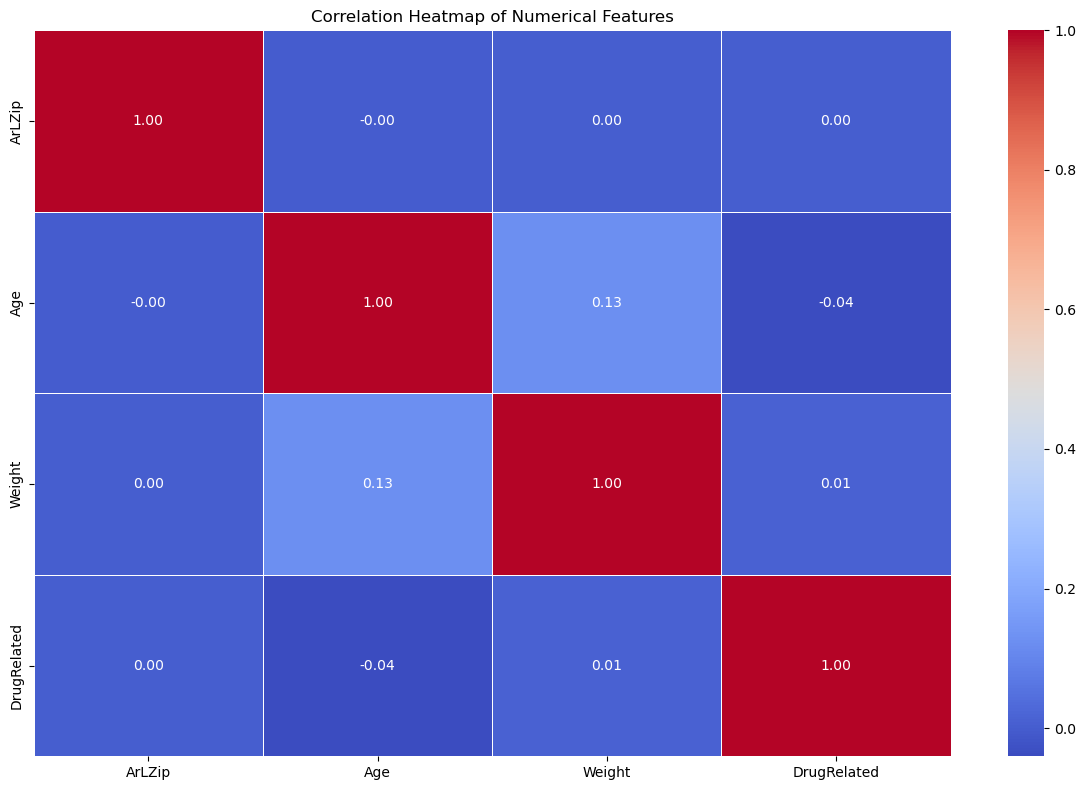

In [56]:
# Step 7: Correlation heatmap for numerical features
numerical_df = data.select_dtypes(include=['int64', 'float64'])

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [14]:
### Observation:

#Age ↔ AgeAtArrestTime: Very high correlation – column not visible since we dropped the later to avoid redundancy.
#All other features show very low correlations, which is good for feature diversity.

<Axes: title={'center': 'Drug-Related Arrests Distribution'}, xlabel='DrugRelated'>

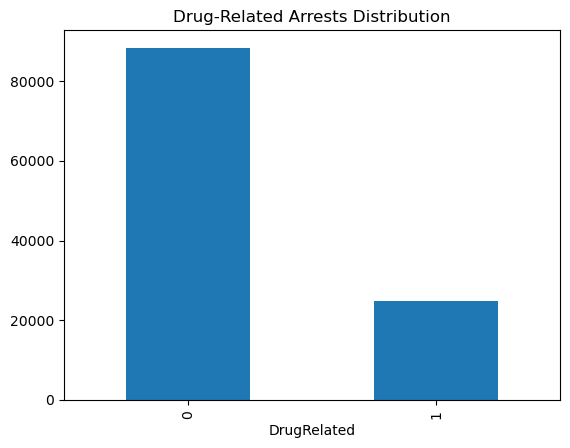

In [58]:
data['DrugRelated'].value_counts(normalize=False).plot(kind='bar', title='Drug-Related Arrests Distribution')

In [111]:
#Here’s our class distribution plot comparing:

#Original Dataset: Imbalanced — ~71K "No", ~20K "Yes"
#Resampled Dataset (SMOTE): Balanced — ~71K "No", ~71K "Yes"
#This confirms SMOTE worked perfectly and we are ready to move on to modeling.

### Using SMOTE technique to handle class imbalance

In [62]:
# Import libraries for resampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop(columns=['DrugRelated'])  # Drop the encoded target column 'Yes'
y = data['DrugRelated']  # Use it as target (1 for Yes, 0 for No)

# Train-test split before resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution before and after
original_distribution = y_train.value_counts()
resampled_distribution = y_train_resampled.value_counts()

original_distribution, resampled_distribution

(DrugRelated
 0    70705
 1    19934
 Name: count, dtype: int64,
 DrugRelated
 0    70705
 1    70705
 Name: count, dtype: int64)

### Model Running

1. Logistic Regression

Confusion Matrix:
 [[14271  3405]
 [ 3461  1523]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81     17676
           1       0.31      0.31      0.31      4984

    accuracy                           0.70     22660
   macro avg       0.56      0.56      0.56     22660
weighted avg       0.70      0.70      0.70     22660

ROC AUC Score: 0.6168294210175889


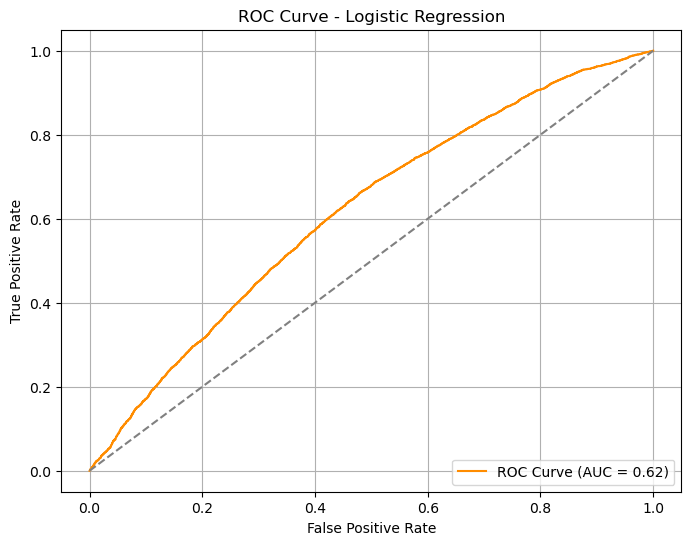

In [64]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Predict probabilities
y_proba = logreg.predict_proba(X_test)[:, 1]

# ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Confusion Matrix:
 [[8741 8935]
 [1565 3419]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.49      0.62     17676
           1       0.28      0.69      0.39      4984

    accuracy                           0.54     22660
   macro avg       0.56      0.59      0.51     22660
weighted avg       0.72      0.54      0.57     22660

ROC AUC Score: 0.6168294210175889


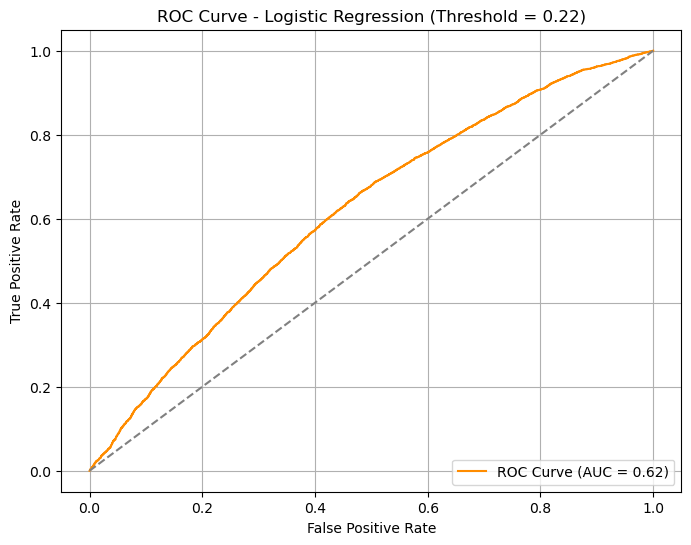

In [85]:
# 1. Logistic Regression with class_weight
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# 2. Predicted probabilities
y_proba = logreg.predict_proba(X_test)[:, 1]

# 3. Applying lower threshold (e.g., 0.3 instead of 0.5)
threshold = 0.22
y_pred_thresh = (y_proba >= threshold).astype(int)

# 4. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Logistic Regression (Threshold = {threshold})")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
#AUC of 0.62 reflects modest separation between the two classes.
#The curve is only slightly above the diagonal baseline — suggesting weak predictive power.

2. Random Forest Clasifier

Confusion Matrix:
 [[16933   743]
 [ 4506   478]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     17676
           1       0.39      0.10      0.15      4984

    accuracy                           0.77     22660
   macro avg       0.59      0.53      0.51     22660
weighted avg       0.70      0.77      0.71     22660

ROC AUC Score: 0.6507770100801407


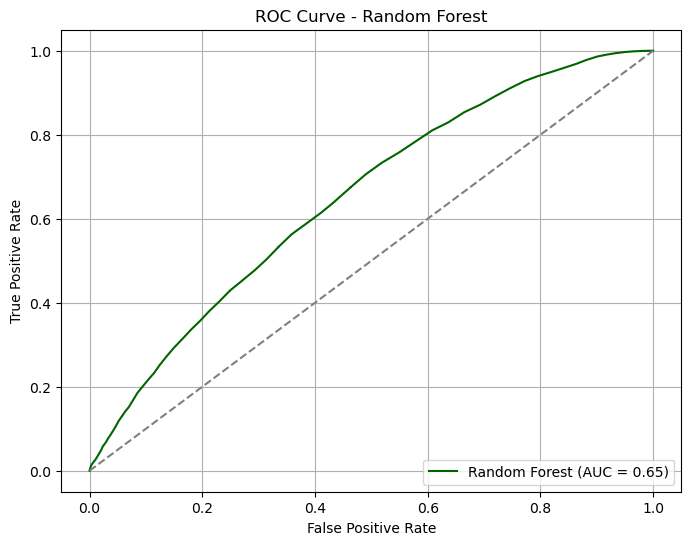

In [69]:
# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# 2. Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 3. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# 4. ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Random Forest Hyperparameter Tuning

In [71]:

# 1. Defining hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

# 2. Initialize model
rf = RandomForestClassifier(random_state=42)

# 3. Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                    # try 20 random combinations
    scoring='f1',                 # optimize for F1-score
    cv=3,                         # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1                     # use all cores
)

# 4. Run search
random_search.fit(X_train_resampled, y_train_resampled)

# 5. Best estimator
best_rf = random_search.best_estimator_

# 6. Predictions and evaluation
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("Best Parameters:", random_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best_rf))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced_subsample', 'bootstrap': False}

Confusion Matrix:
 [[16507  1169]
 [ 4259   725]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86     17676
           1       0.38      0.15      0.21      4984

    accuracy                           0.76     22660
   macro avg       0.59      0.54      0.53     22660
weighted avg       0.70      0.76      0.72     22660

ROC AUC Score: 0.6599607826284208


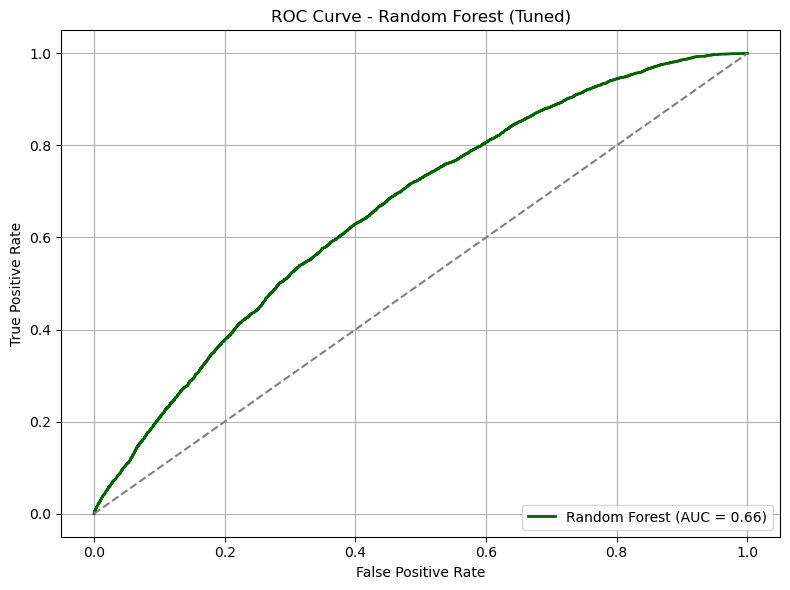

In [73]:
# 6. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Tuned)')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

3. XGBoost

Confusion Matrix:
 [[17319   357]
 [ 4660   324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87     17676
           1       0.48      0.07      0.11      4984

    accuracy                           0.78     22660
   macro avg       0.63      0.52      0.49     22660
weighted avg       0.72      0.78      0.71     22660

ROC AUC Score: 0.6738401195661373


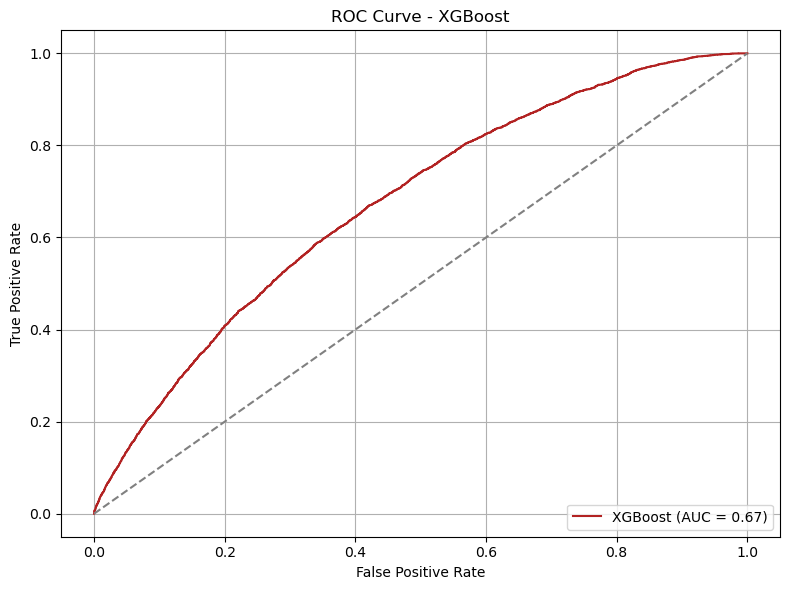

In [75]:
import xgboost as xgb

#  XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=1,        # can tune this for imbalance
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", color='firebrick')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning for XGBoost

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}

Confusion Matrix:
 [[17296   380]
 [ 4659   325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87     17676
           1       0.46      0.07      0.11      4984

    accuracy                           0.78     22660
   macro avg       0.62      0.52      0.49     22660
weighted avg       0.72      0.78      0.71     22660

ROC AUC Score: 0.6762509287470527


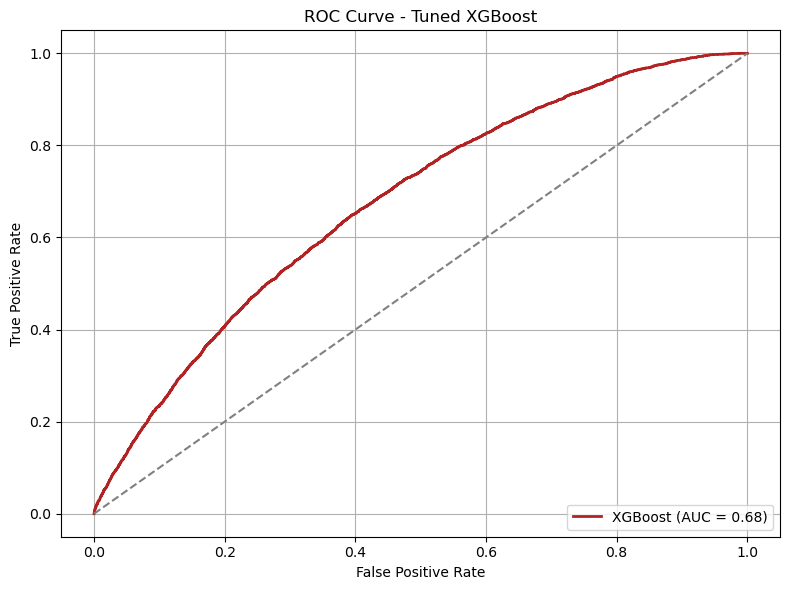

In [77]:
# 1. Defining parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 3, 5, 10],  # important for imbalance
}

# 2. Initializing base XGBoost model
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 3. Setting up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Running the search
xgb_random_search.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_random_search.best_estimator_

# 5. Evaluating best model
y_pred_xgb_best = best_xgb.predict(X_test)
y_proba_xgb_best = best_xgb.predict_proba(X_test)[:, 1]

print("Best Parameters:", xgb_random_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb_best))

# 6. Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='firebrick', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

### Best Model Comparision

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Create a function to compute and return metrics
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

# Example (fill this after running each model)
results = []

# 1. Logistic Regression (threshold adjusted)
results.append(evaluate_model("LogReg (threshold=0.3)", y_test, y_pred_thresh, y_proba))

# 2. Random Forest
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf))

# 3. Random Forest (tuned)
results.append(evaluate_model("Random Forest (tuned)", y_test, y_pred_best_rf, y_proba_best_rf))

# 4. XGBoost
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb))

# 5. XGBoost (tuned)
results.append(evaluate_model("XGBoost (tuned)", y_test, y_pred_xgb_best, y_proba_xgb_best))

# Create DataFrame for display
results_df = pd.DataFrame(results)
#print(results_df.sort_values("F1 Score", ascending=False))
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  LogReg (threshold=0.3)  0.536628   0.276752  0.685995  0.394394  0.616829
1           Random Forest  0.768358   0.391482  0.095907  0.154069  0.650777
2   Random Forest (tuned)  0.760459   0.382788  0.145465  0.210817  0.659961
3                 XGBoost  0.778597   0.475771  0.065008  0.114387  0.673840
4         XGBoost (tuned)  0.777626   0.460993  0.065209  0.114256  0.676251


In [81]:
# Step 1: Label encode the target FIRST
#le = LabelEncoder()
#data['DrugRelated'] = le.fit_transform(data['DrugRelated'])

# Step 2: One-hot encode categorical features (excluding the target)
#data = pd.get_dummies(data, drop_first=True)

# Step 3: Split into X and y
#X = data.drop(columns=['DrugRelated'])
#y = data['DrugRelated']

# Step 4: Fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 5: Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)

# View results
print("\nTop 10 important features:")
print(important_features.head(10))

print("\nLeast important features:")
print(important_features.tail(10))

data.shape


Top 10 important features:
Weight                                   0.144398
ArLZip                                   0.137736
ArArrestTime                             0.127668
ArArrestDate                             0.115085
Age                                      0.112296
ArADOW                                   0.077200
ArPremises_Other                         0.019005
ArPremises_Highway, Street, Alley ETC    0.017910
Sex_Male                                 0.014796
Eyes_Brown                               0.012222
dtype: float64

Least important features:
Occupation_Student           0.000131
ArPremises_School/Daycare    0.000126
ArCond_3.0                   0.000103
Occupation_Healthcare        0.000064
ArCond_2.0                   0.000059
ArAction_Others              0.000034
ArCond_4.0                   0.000030
Eyes_HAZE                    0.000021
ArCond_02                    0.000004
ArCond_03                    0.000002
dtype: float64


(113299, 84)

Explained Variance Ratio: [0.96862722 0.02540566]


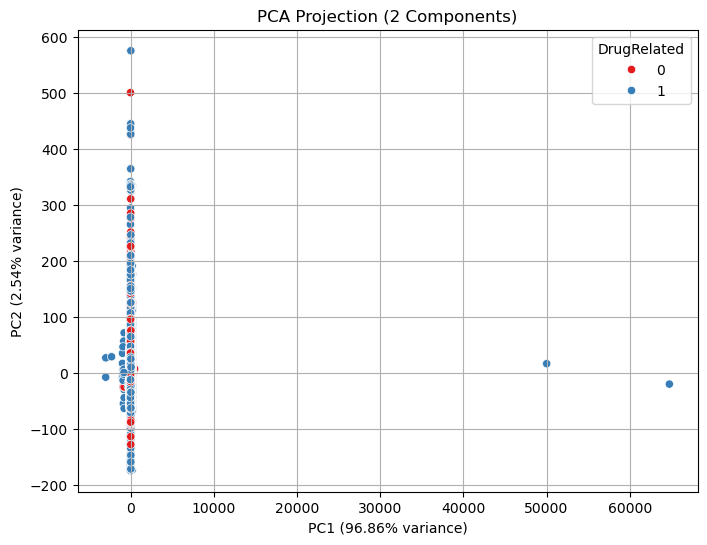

In [1179]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#label_encoder = LabelEncoder()
#data['DrugRelated'] = label_encoder.fit_transform(data['DrugRelated']).astype(int)

x_numeric = data.select_dtypes(include=['number'])

X = x_numeric.drop(columns=['DrugRelated'])
y = x_numeric['DrugRelated']

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_components = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
df_pca["DrugRelated"] = y  # Reattach the target variable

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='DrugRelated', palette='Set1')
plt.title('PCA Projection (2 Components)')
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% variance)")
plt.legend(title='DrugRelated')
plt.grid(True)
plt.show()

In [83]:
from sklearn.metrics import precision_recall_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# 2. Compute F1 for each threshold
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)  # small term to avoid division by 0

# 3. Find threshold that gives best F1
best_threshold = thresholds[np.argmax(f1)]
best_f1 = np.max(f1)

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.4f}")

Best Threshold: 0.22
Best F1 Score: 0.3948


In [135]:
X_test.to_csv("sample.csv", index=False)

In [89]:
new_sample = np.array([[6,23,75215,0,89,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])  # shape: (1, n_features)
#6,3,75261,0,26,250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
#6,23,75261,0,30,250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
#6,3,75215,0,89,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
#6,3,75215,0,89,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

# 1. Predict probability
new_sample_proba = logreg.predict_proba(new_sample)[:, 1]  # probability for class 1

# 2. Apply threshold (0.3)
new_sample_pred = (new_sample_proba >= threshold).astype(int)

print(f"Predicted probability of Drug-Related Arrest: {new_sample_proba[0]:.4f}")
print(f"Predicted Class (threshold {threshold}): {new_sample_pred[0]}")

Predicted probability of Drug-Related Arrest: 0.0025
Predicted Class (threshold 0.22): 0
